# Introduction to Convolutional neural network and computer vision with tensorflow

CV is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

## Get the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip


--2024-05-30 00:14:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170.207, 142.251.175.207, 74.125.24.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.170.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  22.5MB/s    in 6.1s    

2024-05-30 00:14:59 (17.0 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
# # unzip it
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

## Inspect the data (become one with it)

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
import os

# walk through the pizza steak dir and list no of files
for dirpath, dirnames, filesnames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)}, directories and {len(filesnames)} images in {dirpath}.")

There are 2, directories and 0 images in pizza_steak.
There are 2, directories and 0 images in pizza_steak/test.
There are 0, directories and 250 images in pizza_steak/test/steak.
There are 0, directories and 250 images in pizza_steak/test/pizza.
There are 2, directories and 0 images in pizza_steak/train.
There are 0, directories and 750 images in pizza_steak/train/steak.
There are 0, directories and 750 images in pizza_steak/train/pizza.


In [ ]:
!ls -la pizza_steak # extra file in our pizza_steak dir

total 16
drwxr-xr-x 4 root root 4096 May 30 00:14 .
drwxr-xr-x 1 root root 4096 May 30 00:14 ..
drwxr-xr-x 4 root root 4096 May 30 00:14 test
drwxr-xr-x 4 root root 4096 May 30 00:14 train


In [ ]:
# Another way to find out how many images in the file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted(item.name for item in data_dir.glob("*"))) # Create a list of class_names from the subdirectories

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
#Let's visualize our images
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # set up the target directory
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  # Read in the image and plot it
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}")
  return img

['3745515.jpg']
Image shape: (512, 384, 3)


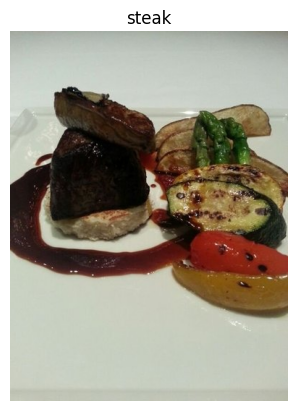

In [ ]:
# view a random image from training dataset
img = view_random_image(target_dir='pizza_steak/train/', target_class="steak")

['792093.jpg']
Image shape: (512, 512, 3)


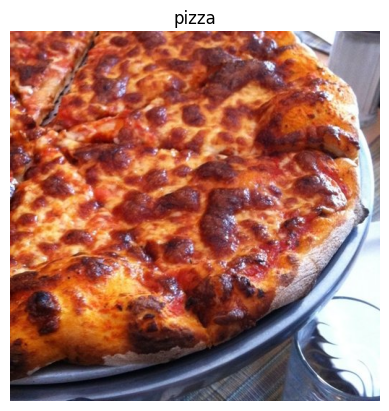

In [ ]:
img = view_random_image(target_dir='pizza_steak/train/', target_class="pizza")

In [ ]:
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[201,  91,  78],
        [198,  88,  75],
        [195,  87,  75],
        ...,
        [ 54,  50,  65],
        [ 54,  50,  65],
        [ 53,  49,  64]],

       [[198,  91,  75],
        [191,  84,  68],
        [184,  78,  64],
        ...,
        [ 57,  53,  68],
        [ 58,  54,  69],
        [ 59,  55,  70]],

       [[177,  75,  52],
        [172,  70,  47],
        [167,  65,  43],
        ...,
        [ 56,  52,  67],
        [ 55,  51,  66],
        [ 55,  51,  66]],

       ...,

       [[ 47,  48,  66],
        [ 47,  48,  66],
        [ 47,  48,  66],
        ...,
        [ 65,  80, 119],
        [ 60,  75, 116],
        [ 55,  73, 113]],

       [[ 53,  54,  74],
        [ 56,  57,  77],
        [ 55,  56,  76],
        ...,
        [ 64,  79, 118],
        [ 67,  82, 123],
        [ 67,  82, 125]],

       [[ 71,  72,  92],
        [ 77,  78,  98],
        [ 75,  76,  96],
        ...,
        [ 68,  82, 12

In [ ]:
img.shape

(512, 512, 3)

In [ ]:
# Get all the pixel values betweenn 0 and 1
img/225.

array([[[0.89333333, 0.40444444, 0.34666667],
        [0.88      , 0.39111111, 0.33333333],
        [0.86666667, 0.38666667, 0.33333333],
        ...,
        [0.24      , 0.22222222, 0.28888889],
        [0.24      , 0.22222222, 0.28888889],
        [0.23555556, 0.21777778, 0.28444444]],

       [[0.88      , 0.40444444, 0.33333333],
        [0.84888889, 0.37333333, 0.30222222],
        [0.81777778, 0.34666667, 0.28444444],
        ...,
        [0.25333333, 0.23555556, 0.30222222],
        [0.25777778, 0.24      , 0.30666667],
        [0.26222222, 0.24444444, 0.31111111]],

       [[0.78666667, 0.33333333, 0.23111111],
        [0.76444444, 0.31111111, 0.20888889],
        [0.74222222, 0.28888889, 0.19111111],
        ...,
        [0.24888889, 0.23111111, 0.29777778],
        [0.24444444, 0.22666667, 0.29333333],
        [0.24444444, 0.22666667, 0.29333333]],

       ...,

       [[0.20888889, 0.21333333, 0.29333333],
        [0.20888889, 0.21333333, 0.29333333],
        [0.20888889, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images
1. Load images
2. Preprocess the images
3. Build a CNN to find patterns in our images
4. Compile the CNN
5. Fit the CNN to our training data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


# Change the runtime environment to TGPU to run this cell faster

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 15s 193ms/step - loss: 0.5545 - accuracy: 0.7273 - val_loss: 0.4728 - val_accuracy: 0.7560
Epoch 2/5
47/47 [==============================] - 7s 145ms/step - loss: 0.4305 - accuracy: 0.8020 - val_loss: 0.3517 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 5s 115ms/step - loss: 0.3963 - accuracy: 0.8393 - val_loss: 0.3886 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 7s 151ms/step - loss: 0.3557 - accuracy: 0.8467 - val_loss: 0.3136 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 6s 119ms/step - loss: 0.3031 - accuracy: 0.8767 - val_loss: 0.3077 - val_accuracy: 0.8660


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Using the same model as before
Let's replicate the model we've built in a previous section if it works with our image data.

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
history_2 = model_2.fit(train_data,
            epochs=5,
            steps_per_epoch = len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 107ms/step - loss: 0.9710 - accuracy: 0.4893 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 7s 140ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 111ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 133ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 114ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_3 = model_3.fit(train_data,
            epochs=5,
            steps_per_epoch = len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 7s 108ms/step - loss: 3.3919 - accuracy: 0.6267 - val_loss: 0.6844 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 6s 129ms/step - loss: 1.1271 - accuracy: 0.6973 - val_loss: 0.6069 - val_accuracy: 0.7440
Epoch 3/5
47/47 [==============================] - 5s 116ms/step - loss: 0.6819 - accuracy: 0.7453 - val_loss: 0.9341 - val_accuracy: 0.6960
Epoch 4/5
47/47 [==============================] - 6s 130ms/step - loss: 0.8936 - accuracy: 0.7027 - val_loss: 0.5928 - val_accuracy: 0.7780
Epoch 5/5
47/47 [==============================] - 5s 114ms/step - loss: 0.6311 - accuracy: 0.7707 - val_loss: 0.4629 - val_accuracy: 0.7700


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Binary classification:
1. Become one with the data
2. Preprocess the data
3. Create a model
4. Compile the model
5. Fit the model with training data
6. Evaluate the model with test data
7. Adjust different parameters

### Become one with the data

['3260624.jpg']
Image shape: (512, 512, 3)
['3207504.jpg']
Image shape: (512, 512, 3)


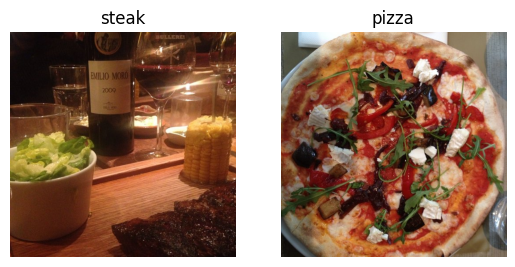

In [ ]:
# visualize the data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/","steak")

plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

 ### Preprocess the data

In [ ]:
# Define the directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look to all images at one time, a model only look at 32 image at a time.

In [ ]:
# Create train and test data generations and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Load in our image data and turn them into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next() # next batch of images/labels in train data
len(images), len(labels)

(32, 32)

### Create a CNN model (start with a baseline)


In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])


In [ ]:
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

### Evaluate the model

In [ ]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 181ms/step - loss: 0.5564 - accuracy: 0.7127 - val_loss: 0.3787 - val_accuracy: 0.8260
Epoch 2/5
47/47 [==============================] - 6s 124ms/step - loss: 0.3383 - accuracy: 0.8600 - val_loss: 0.3344 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 6s 122ms/step - loss: 0.2039 - accuracy: 0.9273 - val_loss: 0.4258 - val_accuracy: 0.8040
Epoch 4/5
47/47 [==============================] - 6s 118ms/step - loss: 0.0937 - accuracy: 0.9753 - val_loss: 0.3403 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 7s 141ms/step - loss: 0.0269 - accuracy: 0.9973 - val_loss: 0.5384 - val_accuracy: 0.8100


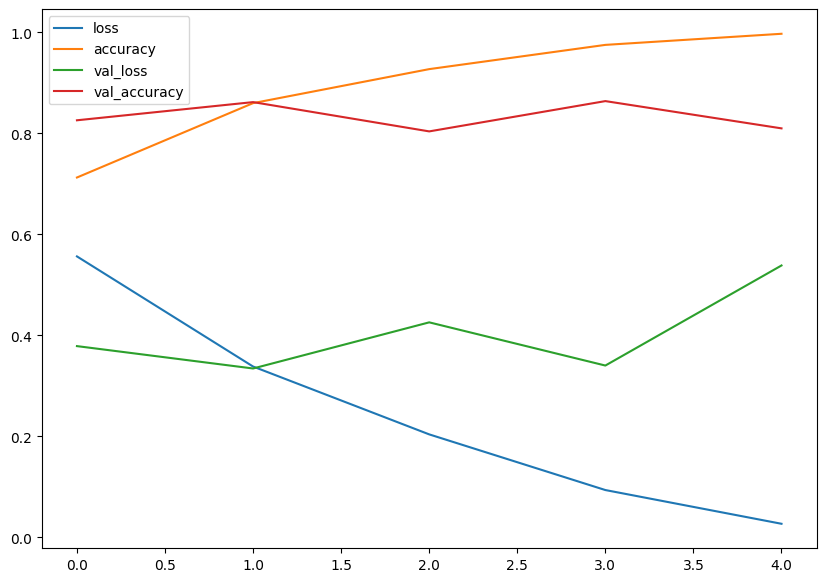

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [ ]:
# Function to evaluate the model
# Plot the validation and training data separately
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

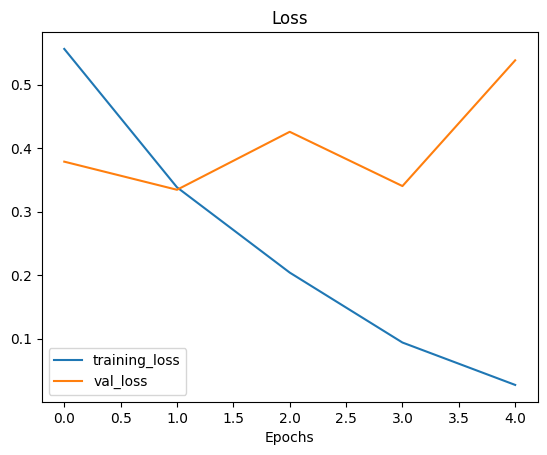

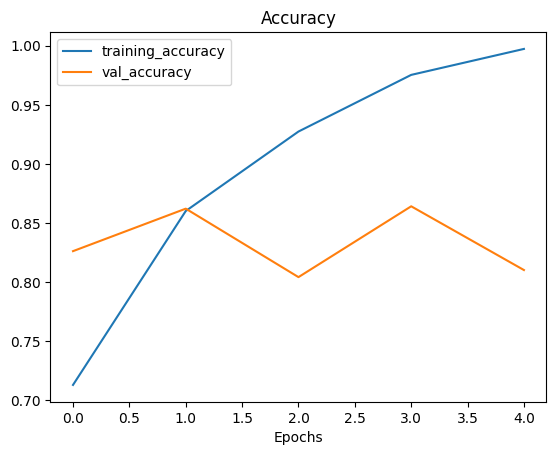

In [ ]:
plot_loss_curves(history_4)

**Note** - This model is overfitting

### Adjust the model parameters

Fitting a ML model comes in 2 steps:
1. Create a baseline
2. Beat the baseline by overfitting a larger model
3. Reduce overfitting

Ways to induce overfitting:
1. Increase the number of conv layer
2. Increase the number of conv filters
3. Add another dense layer to the output of our flatten layer

Reduce overfitting:
1. Add data augmentation
2. Add regularization layer
3. Add more data

In [ ]:
# Create the model

model_5 = Sequential([
    Conv2D(10,3, activation='relu',input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [ ]:
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 126ms/step - loss: 0.6223 - accuracy: 0.6653 - val_loss: 0.5629 - val_accuracy: 0.7020
Epoch 2/5
47/47 [==============================] - 6s 135ms/step - loss: 0.4627 - accuracy: 0.7887 - val_loss: 0.3785 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 6s 118ms/step - loss: 0.4235 - accuracy: 0.8287 - val_loss: 0.3638 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 6s 133ms/step - loss: 0.3850 - accuracy: 0.8360 - val_loss: 0.3436 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 5s 117ms/step - loss: 0.3489 - accuracy: 0.8500 - val_loss: 0.3629 - val_accuracy: 0.8520


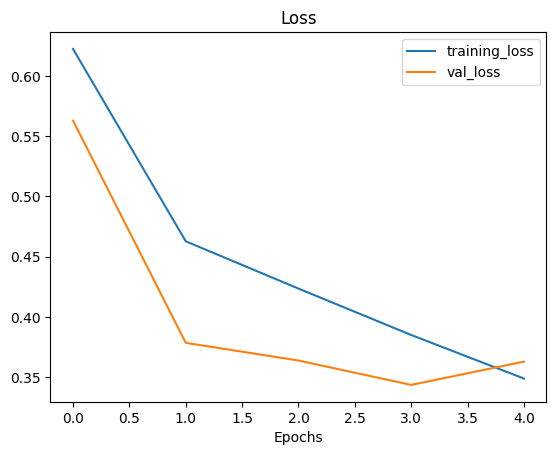

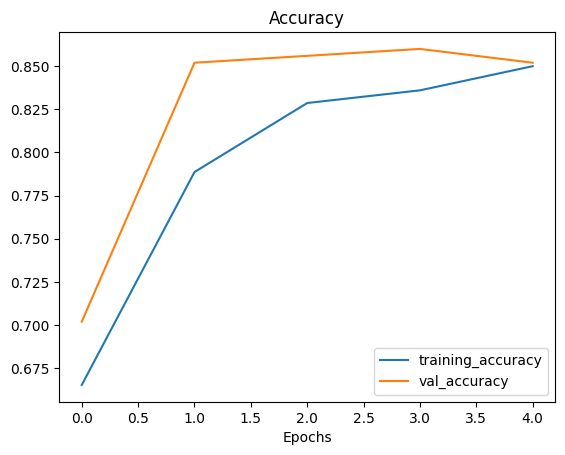

In [ ]:
plot_loss_curves(history_5)

**Note** - This model is not overfitting

In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

### Opening our bag of tricks and finding data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale=1/225.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)
# Create ImageGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/225.)

# Create ImageGenerator without data augmentation for test dataset
test_datagen = ImageDataGenerator(rescale=1/225.)



**Note** - Data augmentataion is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable patterns.

In [ ]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   batch_size=32,
                                                                   target_size=(224, 224),
                                                                   class_mode='binary',
                                                                   shuffle=False)
print("Non-augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                           target_size=(224, 224),
                           batch_size=32,
                           class_mode='binary',
                           shuffle=False)

print("Non-augmented test data")

test_data = test_datagen.flow_from_directory(train_dir,
                           target_size=(224, 224),
                           batch_size=32,
                           class_mode='binary',
                           shuffle=False)


Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 1500 images belonging to 2 classes.


**Note** - Data augmentation is only performed on training data

In [ ]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

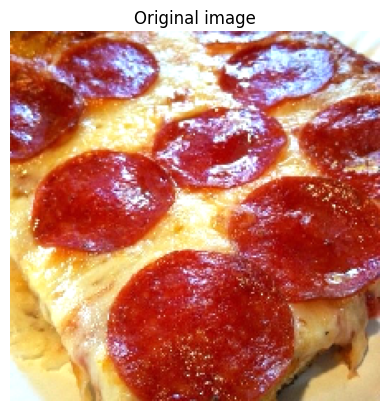

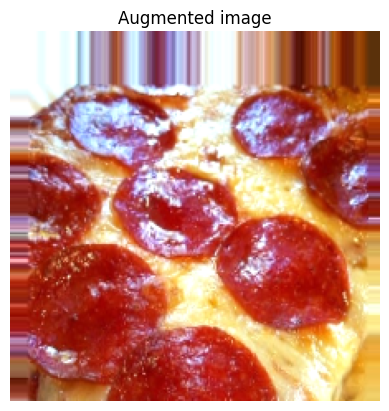

In [ ]:
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [ ]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 492ms/step - loss: 0.7990 - accuracy: 0.4673 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 25s 525ms/step - loss: 0.6936 - accuracy: 0.3627 - val_loss: 0.6933 - val_accuracy: 0.4507
Epoch 3/5
47/47 [==============================] - 25s 531ms/step - loss: 0.6934 - accuracy: 0.4680 - val_loss: 0.6932 - val_accuracy: 0.5067
Epoch 4/5
47/47 [==============================] - 23s 491ms/step - loss: 0.6934 - accuracy: 0.4987 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 24s 514ms/step - loss: 0.6934 - accuracy: 0.3507 - val_loss: 0.6932 - val_accuracy: 0.5053


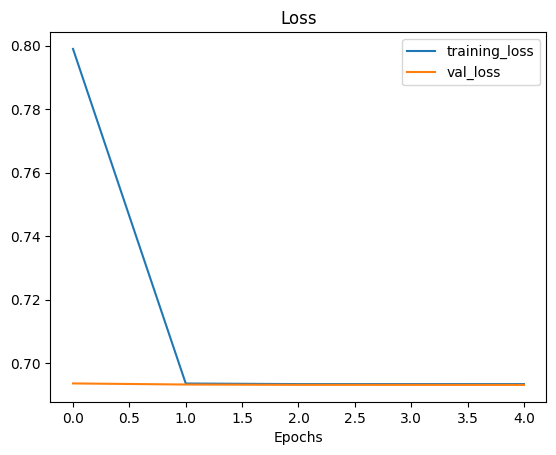

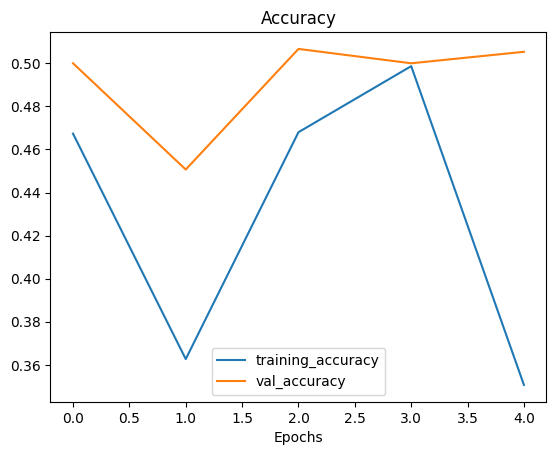

In [ ]:
plot_loss_curves(history_6)

**Question**: Why didn't our model get very good results on the training set to begin with?

It's because when we created train_data_augmented we turned off data shuffling using shuffle=False which means our model only sees a batch of a single kind of images at a time

In [ ]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 494ms/step - loss: 0.6493 - accuracy: 0.6127 - val_loss: 0.5424 - val_accuracy: 0.7493
Epoch 2/5
47/47 [==============================] - 24s 505ms/step - loss: 0.5322 - accuracy: 0.7360 - val_loss: 0.4346 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 26s 555ms/step - loss: 0.5004 - accuracy: 0.7587 - val_loss: 0.4147 - val_accuracy: 0.8213
Epoch 4/5
47/47 [==============================] - 25s 530ms/step - loss: 0.4854 - accuracy: 0.7720 - val_loss: 0.3978 - val_accuracy: 0.8213
Epoch 5/5
47/47 [==============================] - 25s 525ms/step - loss: 0.4570 - accuracy: 0.7853 - val_loss: 0.4050 - val_accuracy: 0.8093


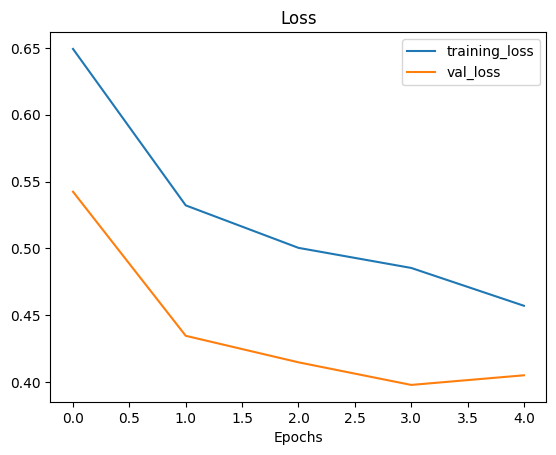

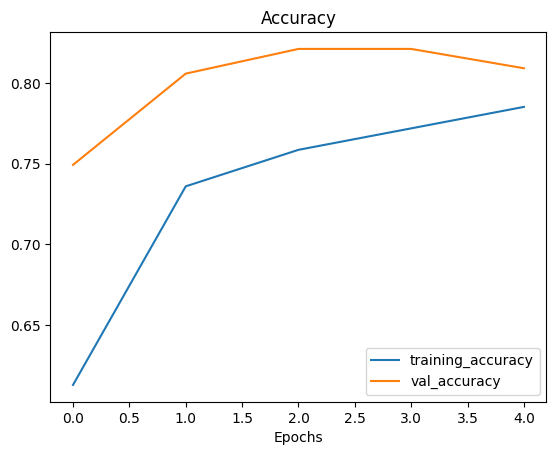

In [ ]:
plot_loss_curves(history_7)

**Note** - When shuffling training data, the model gets exposed to all different kind of data during training, thus enabling it to learn features across a wide array of images.

### Repeat until satisfied
Few things we can try to improve our model:
1. Increase the number of model layers.
2. Increase the number of filters in each convolutional layer
3. Train for longer(more epochs)
4. Find an ideal learning rate
5. Get more data
6. Use **transfer leanring** (in future modules) to leverage what another image model has learn and adjust it for our own use case.

## Making a prediction with our trained model on our custom data

In [ ]:
print(class_names)

['pizza' 'steak']


(-0.5, 3023.5, 4031.5, -0.5)

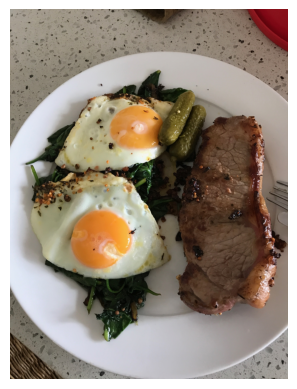

In [ ]:
# View our example
import matplotlib.image as mpimg
steak = mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis(False)

In [ ]:
steak.shape

(4032, 3024, 3)

In [ ]:
expanded_steak = tf.expand_dims(steak, axis=0)

In [ ]:
def load_and_prep_image(filename, img_shape=224):
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  # Rescale
  img = img/224.
  return img

In [ ]:
# Load and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")

In [ ]:
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.7260045 , 0.70814735, 0.65904015],
        [0.7405134 , 0.719308  , 0.671317  ],
        [0.719308  , 0.69252235, 0.6389509 ],
        ...,
        [0.59375   , 0.05803571, 0.10267857],
        [0.5636161 , 0.04799107, 0.08035714],
        [0.6015625 , 0.08816964, 0.11941964]],

       [[0.75334823, 0.7354911 , 0.6953125 ],
        [0.7271205 , 0.7092634 , 0.655692  ],
        [0.74665177, 0.7198661 , 0.66629463],
        ...,
        [0.609375  , 0.078125  , 0.10491072],
        [0.6032366 , 0.06752232, 0.10770089],
        [0.5853795 , 0.06305803, 0.09877232]],

       [[0.7421875 , 0.72433037, 0.6707589 ],
        [0.7276786 , 0.69866073, 0.64620537],
        [0.74720985, 0.71372765, 0.6635045 ],
        ...,
        [0.60491073, 0.07366072, 0.09151786],
        [0.6004464 , 0.078125  , 0.11383928],
        [0.5948661 , 0.05915179, 0.09933036]],

       ...,

       [[0.5613839 , 0.48660713, 0.35323662],
        [0.06

In [ ]:
pred = model_7.predict(tf.expand_dims(steak,axis=0))

1/1 [==============================] - 0s 246ms/step


The image is outputs as a prediction probability.

In [ ]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names = class_names):
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 23ms/step


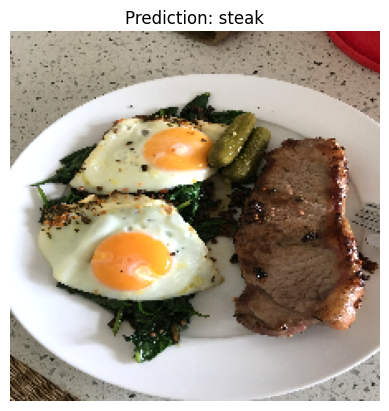

In [ ]:
pred_and_plot(model_7, "03-steak.jpeg")

# Multiclass image classification

1. Become one with the data
2. Preprocess the data
3. Create a model
4. Fit the model
5. Evaluate the model
6. Adjust the hyperparameters
7. Repeat until satisfied

### 1. Become one with data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2024-05-30 00:23:56--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.175.207, 74.125.24.207, 142.251.10.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.175.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  22.3MB/s    in 24s     

2024-05-30 00:24:20 (20.6 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# Walk through 10 classes of food image data
for dirpath, dirname, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirname)} directories and {len(filenames)} images in {dirpath}.")

There are 2 directories and 0 images in 10_food_classes_all_data.
There are 10 directories and 0 images in 10_food_classes_all_data/test.
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry.
There are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger.
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings.
There are 0 directories and 250 images in 10_food_classes_all_data/test/steak.
There are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon.
There are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream.
There are 0 directories and 250 images in 10_food_classes_all_data/test/sushi.
There are 0 directories and 250 images in 10_food_classes_all_data/test/ramen.
There are 0 directories and 250 images in 10_food_classes_all_data/test/pizza.
There are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice.
There are 10 directories and 0 ima

In [ ]:
# Setup the train and test directories

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Let's get the class names
import pathlib
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted(item.name for item in data_dir.glob('*')))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['1007277.jpg']
Image shape: (307, 512, 3)


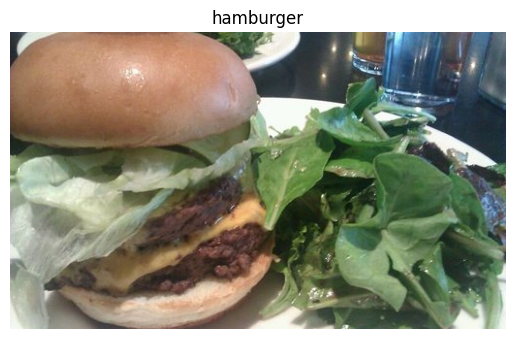

In [ ]:
import random
img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names))

### 2. Preprocess the data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/225.)
test_datagen = ImageDataGenerator(rescale=1/225.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical'
                                               )
test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical'
                                               )



Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
model_8 = Sequential([
    Conv2D(10, 3, activation='relu',input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])
model_8.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 32s 126ms/step - loss: 2.1558 - accuracy: 0.2068 - val_loss: 2.0100 - val_accuracy: 0.2944
Epoch 2/5
235/235 [==============================] - 31s 133ms/step - loss: 1.9407 - accuracy: 0.3255 - val_loss: 1.9209 - val_accuracy: 0.3240
Epoch 3/5
235/235 [==============================] - 31s 131ms/step - loss: 1.7845 - accuracy: 0.3900 - val_loss: 1.8866 - val_accuracy: 0.3428
Epoch 4/5
235/235 [==============================] - 31s 133ms/step - loss: 1.5605 - accuracy: 0.4709 - val_loss: 1.9482 - val_accuracy: 0.3420
Epoch 5/5
235/235 [==============================] - 29s 124ms/step - loss: 1.3163 - accuracy: 0.5684 - val_loss: 1.9756 - val_accuracy: 0.3576


In [ ]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 54, 54, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 26, 26, 10)       

### 5. Evaluate the model

In [ ]:
model_8.evaluate(test_data)

79/79 [==============================] - 7s 94ms/step - loss: 1.9756 - accuracy: 0.3576


[1.9756073951721191, 0.35760000348091125]

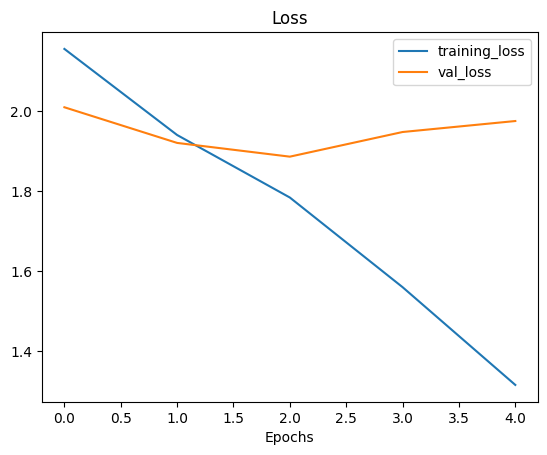

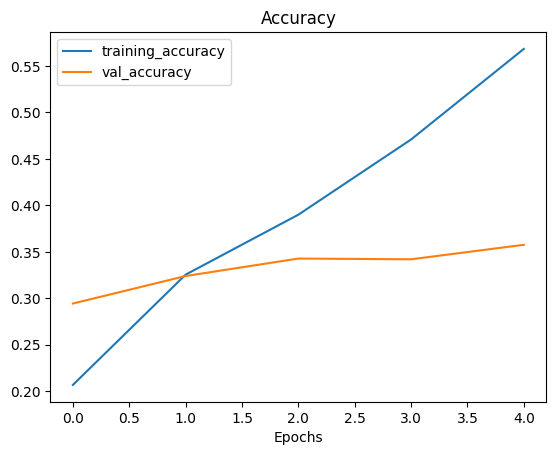

In [ ]:
# Check out the model's loss curve
plot_loss_curves(history_8)

**Note** - The model is overfitting the training data

### 6. Adjust the model hyperparameters

In [ ]:
#Remove some layers
model_9 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])
model_9.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
history_9 = model_9.fit(train_data,epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 38s 159ms/step - loss: 2.1322 - accuracy: 0.2344 - val_loss: 2.0077 - val_accuracy: 0.2984
Epoch 2/5
235/235 [==============================] - 28s 118ms/step - loss: 1.8475 - accuracy: 0.3621 - val_loss: 1.9500 - val_accuracy: 0.3028
Epoch 3/5
235/235 [==============================] - 33s 141ms/step - loss: 1.3827 - accuracy: 0.5468 - val_loss: 2.0560 - val_accuracy: 0.3028
Epoch 4/5
235/235 [==============================] - 30s 129ms/step - loss: 0.7868 - accuracy: 0.7537 - val_loss: 2.5223 - val_accuracy: 0.2996
Epoch 5/5
235/235 [==============================] - 28s 121ms/step - loss: 0.3773 - accuracy: 0.8952 - val_loss: 3.1362 - val_accuracy: 0.2980


In [ ]:
model_9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 54, 54, 10)        0         
 ng2D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 29160)             0         
                                                                 
 dense_13 (Dense)            (None, 10)               

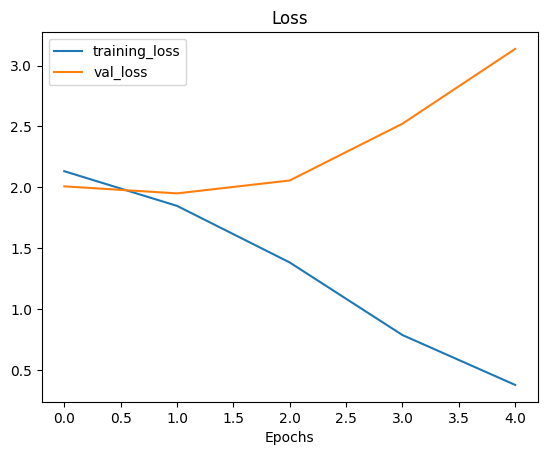

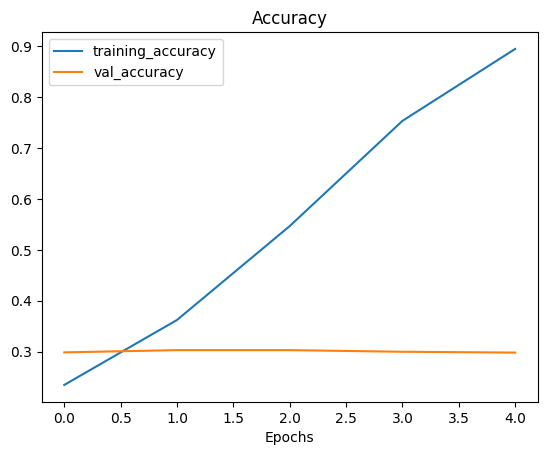

In [ ]:
plot_loss_curves(history_9)

This model overfitted the training data even more.
Let's try data augmentation

### Reducing the overfitting with data augmentataion

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/225.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='categorical',
                                                                            shuffle=True)

Found 7500 images belonging to 10 classes.


In [ ]:
model_10 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])
model_10.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_10 = model_10.fit(train_data_augmented_shuffled,epochs=5,
            steps_per_epoch=len(train_data_augmented_shuffled),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 109s 458ms/step - loss: 2.2665 - accuracy: 0.1676 - val_loss: 2.1509 - val_accuracy: 0.2208
Epoch 2/5
235/235 [==============================] - 107s 457ms/step - loss: 2.1341 - accuracy: 0.2396 - val_loss: 2.1318 - val_accuracy: 0.2552
Epoch 3/5
235/235 [==============================] - 106s 452ms/step - loss: 2.0722 - accuracy: 0.2748 - val_loss: 1.9380 - val_accuracy: 0.3180
Epoch 4/5
235/235 [==============================] - 111s 471ms/step - loss: 2.0255 - accuracy: 0.2945 - val_loss: 1.8481 - val_accuracy: 0.3540
Epoch 5/5
235/235 [==============================] - 110s 468ms/step - loss: 2.0008 - accuracy: 0.3081 - val_loss: 1.8846 - val_accuracy: 0.3340


**Note** - The augmented data takes more time to run because we are augmenting the data on the go.

In [ ]:
model_10.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 54, 54, 10)        0         
 ng2D)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 29160)             0         
                                                                 
 dense_14 (Dense)            (None, 10)               

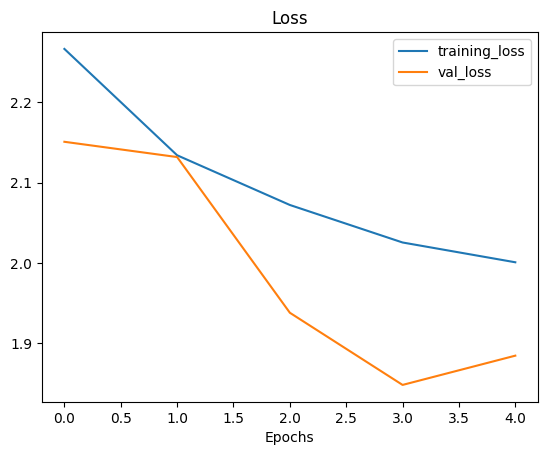

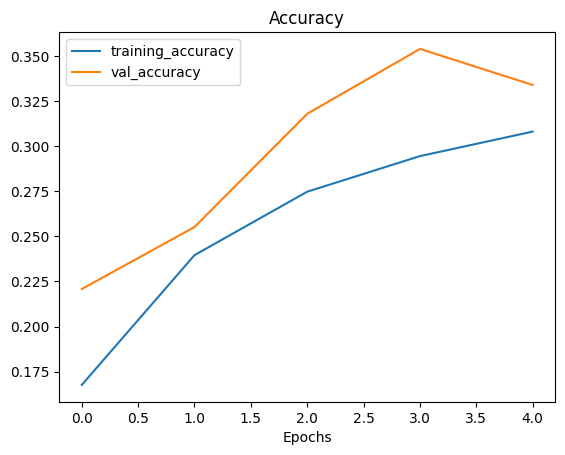

In [ ]:
plot_loss_curves(history_10)

**Note** - Overfitting is reduced significantly.

### 7. Repeat until satisfied

### Let's make prediction on custom images

In [ ]:
def pred_and_plot(model, filename, class_names = class_names):
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  #Add in logic for multi-class
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 68ms/step


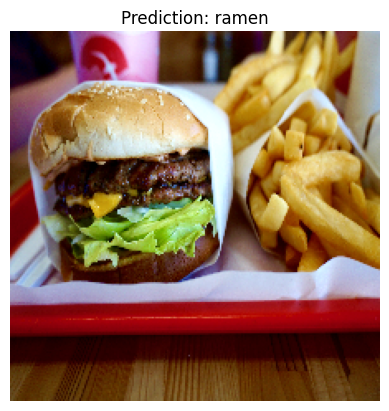

In [ ]:
pred_and_plot(model=model_10,
              filename='03-hamburger.jpeg',
              class_names=class_names)

### Save and load our model

In [ ]:
#save the model
model_10.save("saved_model_10")

In [ ]:
# load the model
loaded_model_10 = tf.keras.models.load_model('saved_model_10')

In [ ]:
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 8s 101ms/step - loss: 1.8846 - accuracy: 0.3340


[1.884574055671692, 0.33399999141693115]